In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#load Dataset
raw_data = pd.read_csv('Data/WeatherData.csv')
print(raw_data)
#Normalize data
scaler = MinMaxScaler()
data = scaler.fit_transform(raw_data.values)
print(data)

    Htemp  Ltemp  Humidity  Pressure  Yield
0      74     19        61     30.23   7340
1      84     17        72     30.16   7340
2      86     43        67     29.97   7340
3      87     50        70     30.07   7340
4      98     64        67     29.98   7340
5     101     69        67     29.96   7340
6     102     63        65     29.99   7340
7      98     54        63     30.01   7340
8      97     45        63     30.07   7340
9      78     30        73     30.14   7340
10     75     27        57     30.11   6920
11     87     32        65     30.00   6920
12     83     43        64     30.01   6920
13     89     51        67     30.01   6920
14     97     66        68     29.99   6920
15    103     71        70     30.00   6920
16    100     68        75     30.00   6920
17     95     56        65     30.05   6920
18     89     44        78     30.10   6920
19     82     29        77     30.15   6920
20     81     25        76     30.01   7490
21     85     29        71     3

In [5]:
#splitting the data set
train_data = raw_data.sample(frac=0.8, random_state=1)
test_data = raw_data.drop(train_data.index)


In [6]:
#building the OLS model
X = train_data[['Htemp', 'Ltemp', 'Humidity', 'Pressure']]
y = train_data['Yield']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

#print summary of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     4.344
Date:                Mon, 24 Apr 2023   Prob (F-statistic):            0.00487
Time:                        13:02:34   Log-Likelihood:                -312.12
No. Observations:                  48   AIC:                             634.2
Df Residuals:                      43   BIC:                             643.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.67e+04   1.41e+04      2.609      0.012    8327.625    6.51e+04
Htemp          1.7080      6.797      0.251      0.803     -11.999      15.415
Ltemp         -4.6432      3.565     -1.302      0.200     -11.833       2.547
Humidity      15.0938      4.284      3.523      0.001       6.454      23.734
Pressure   -1010.6072    465.444     -2.171      0.035   -1949.265     -71.949
==============================================================================
Omnibus:                       21.283   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.882
Skew:                          -1.558   Prob(JB):                     5.35e-07
Kurtosis:                       5.174   Cond. No.                     7.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_test = sm.add_constant(test_data[['Htemp', 'Ltemp', 'Humidity', 'Pressure']])
y_pred = model.predict(X_test)
print('Predictions :\n' ,y_pred)
#print('Prediction Avg', np.mean(y_pred))
print(' Yield : \n',test_data['Yield'])

# Calculate the mean squared error
mse = mean_squared_error(test_data['Yield'], y_pred)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_data['Yield'], y_pred)
print('Mean Absolute Error:', mae)

Predictions :
 0     7111.003229
1     7374.143333
5     7288.387487
8     7221.449614
9     7338.840109
11    7365.660755
12    7282.554135
15    7287.374131
16    7371.648388
37    7567.580658
43    7539.075347
57    7453.108383
dtype: float64
 Yield : 
 0     7340
1     7340
5     7340
8     7340
9     7340
11    6920
12    6920
15    6920
16    6920
37    7520
43    7480
57    7500
Name: Yield, dtype: int64
Mean Squared Error: 62273.86221477983
Root Mean Squared Error: 249.5473145813832
Mean Absolute Error: 184.60399373800192


In [8]:
import pandas as pd
import statsmodels.api as sm

# load new data
new_data = pd.read_csv('Data/new_data.csv')

# extract input variables
X_new = new_data[['Htemp', 'Ltemp', 'Humidity', 'Pressure']]

# add constant term to input variables
X_new = sm.add_constant(X_new)

# predict the yield for the new data
y_pred2 = model.predict(X_new)

# extract the actual yield values for the new data
actual_yield = new_data['Yield']

# print the predictions and actual yield values
print('Predictions:\n', y_pred2)
print('Actual Yield:\n', actual_yield)

# calculate the mean squared error
mse = mean_squared_error(actual_yield, y_pred2)
print('Mean Squared Error:', mse)

# calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# calculate the mean absolute error
mae = mean_absolute_error(actual_yield, y_pred2)
print('Mean Absolute Error:', mae)

Predictions:
 0    7479.507477
1    7305.096210
2    7364.980702
3    7314.261635
4    7431.115652
5    7355.797793
6    7320.078870
7    7331.403827
8    7507.655772
9    7214.412668
dtype: float64
Actual Yield:
 0    7630
1    7630
2    7630
3    7630
4    7630
5    7630
6    7630
7    7630
8    7630
9    7630
Name: Yield, dtype: int64
Mean Squared Error: 78576.997197116
Root Mean Squared Error: 280.3158882352479
Mean Absolute Error: 267.56893939902346


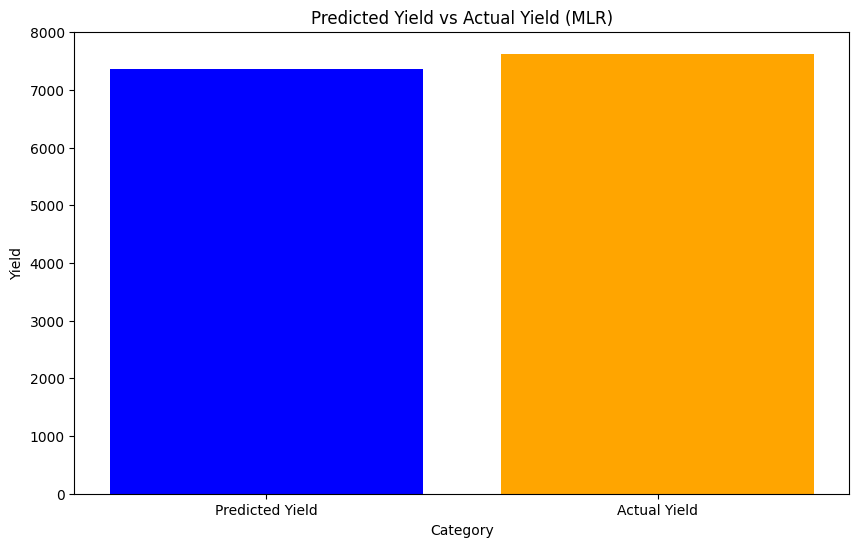

In [14]:
import matplotlib.pyplot as plt
# Define colors for the bars
colors = ['blue', 'orange']
plt.figure(figsize=(10, 6))
plt.bar(['Predicted Yield', 'Actual Yield'], [y_pred2.mean(), actual_yield.mean()], color=colors)
plt.xlabel('Category')
plt.ylabel('Yield')
plt.title('Predicted Yield vs Actual Yield (MLR)')
plt.show()


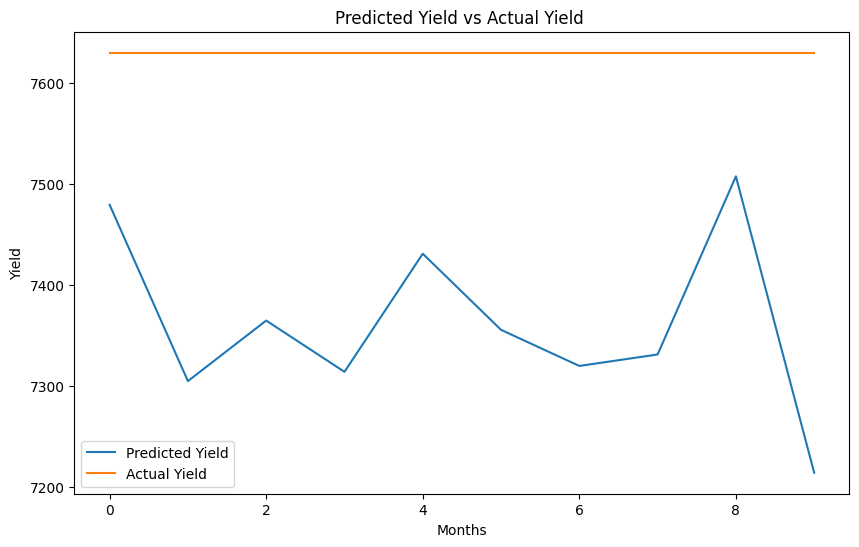

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred2, label='Predicted Yield')
plt.plot(actual_yield, label='Actual Yield')
plt.xlabel('Months')
plt.ylabel('Yield')
plt.title('Predicted Yield vs Actual Yield ')
plt.legend()
plt.show()